In [1]:
%%capture
!pip install datasets
!pip install --upgrade arabic-reshaper
!pip install python-bidi
!pip install git+https://github.com/ARBML/tnkeeh.git
!pip install git+https://github.com/ARBML/tkseem.git

In [2]:
import pandas as pd
import json
import datasets
ashaar = datasets.load_dataset('MagedSaeed/ashaar')

Downloading:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

Using custom data configuration MagedSaeed--ashaar-26ef147565bd1165


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/MagedSaeed___parquet/MagedSaeed--ashaar-26ef147565bd1165/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df = ashaar['train'].to_pandas()
df

,poem title,poem meter,poem verses,poem theme,poem url,poet name,poet description,poet url,poet era,poet location,poem description,poem language type
0,أصبح الملك للذي فطر الخلق,بحر الخفيف,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",قصيدة دينية,https://www.aldiwan.net/poem16182.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
1,من أي مولى ارتجي,بحر مجزوء الرمل,"[مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...",قصيدة دينية,https://www.aldiwan.net/poem16183.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
2,العبد عبدك يا من أنت سيده,بحر البسيط,"[العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...",قصيدة ذم,https://www.aldiwan.net/poem16184.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
3,لو كنت أطمع بالمنام توهما,بحر الكامل,"[لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...",قصيدة عامه,https://www.aldiwan.net/poem16185.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
4,يعد علي أنفاسي ذنوبا,بحر الوافر,"[يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...",قصيدة عامه,https://www.aldiwan.net/poem16186.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
254625,None,المضارع,"[وعندنا ليس محض, إلى الشرق أن تولي]",None,None,dataset collectors,None,None,None,None,None,فصيح
254626,None,المضارع,"[من الليالي نهار, ومن عتمها ضياء]",None,None,dataset collectors,None,None,None,None,None,فصيح
254627,None,المضارع,"[مقامه إذ تجلى, وفي البيد إذ تحلى]",None,None,dataset collectors,None,None,None,None,None,فصيح
254628,None,المضارع,"[على بابك انتظرنا, وفي البال ألف حيلة, من الوص...",None,None,dataset collectors,None,None,None,None,None,فصيح


In [4]:
# always work on a copy :)
df_copy = df.copy(deep=True)
df_copy['poem count'] = df_copy['poem verses'].apply(lambda poem: len(poem)/2)
df_copy['poem verses str'] = df_copy['poem verses'].apply(lambda verses: ' '.join(verse for verse in verses))
len(df_copy)

254630

In [5]:
df_copy

,poem title,poem meter,poem verses,poem theme,poem url,poet name,poet description,poet url,poet era,poet location,poem description,poem language type,poem count,poem verses str
0,أصبح الملك للذي فطر الخلق,بحر الخفيف,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",قصيدة دينية,https://www.aldiwan.net/poem16182.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,10.0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...
1,من أي مولى ارتجي,بحر مجزوء الرمل,"[مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...",قصيدة دينية,https://www.aldiwan.net/poem16183.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,15.0,مِن أَي مَولى اِرتَجي وَلاي باب التَجي وَاللَه...
2,العبد عبدك يا من أنت سيده,بحر البسيط,"[العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...",قصيدة ذم,https://www.aldiwan.net/poem16184.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,12.5,العَبد عَبدك يا مَن أَنتَ سَيدهُ وَلَيسَ غَيرك...
3,لو كنت أطمع بالمنام توهما,بحر الكامل,"[لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...",قصيدة عامه,https://www.aldiwan.net/poem16185.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,27.0,لَو كُنتَ أَطمَع بِالمَنام تَوهما لَسالَت طَيف...
4,يعد علي أنفاسي ذنوبا,بحر الوافر,"[يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...",قصيدة عامه,https://www.aldiwan.net/poem16186.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,21.0,يعد عَليَّ أَنفاسي ذُنوباً إِذا ما قُلت أَفديه...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254625,None,المضارع,"[وعندنا ليس محض, إلى الشرق أن تولي]",None,None,dataset collectors,None,None,None,None,None,فصيح,1.0,وعندنا ليس محض إلى الشرق أن تولي
254626,None,المضارع,"[من الليالي نهار, ومن عتمها ضياء]",None,None,dataset collectors,None,None,None,None,None,فصيح,1.0,من الليالي نهار ومن عتمها ضياء
254627,None,المضارع,"[مقامه إذ تجلى, وفي البيد إذ تحلى]",None,None,dataset collectors,None,None,None,None,None,فصيح,1.0,مقامه إذ تجلى وفي البيد إذ تحلى
254628,None,المضارع,"[على بابك انتظرنا, وفي البال ألف حيلة, من الوص...",None,None,dataset collectors,None,None,None,None,None,فصيح,2.0,على بابك انتظرنا وفي البال ألف حيلة من الوصل ل...


In [6]:
has_theme_df = df_copy.dropna(subset=['poem theme'])

In [7]:
has_theme_df['poem theme'].value_counts()

قصيدة قصيره       25911
قصيدة عامه        20611
قصيدة مدح          5165
قصيدة رومنسيه      4074
قصيدة حزينه        2277
قصيدة عتاب         2032
قصيدة هجاء         1614
قصيدة غزل          1416
قصيدة دينية        1186
قصيدة رثاء          917
قصيدة شوق           901
قصيدة فراق          591
قصيدة ذم            420
قصيدة وطنيه         343
قصيدة الاناشيد       28
قصيدة سياسية         16
قصيدة المعلقات       10
قصيدة اعتذار          8
Name: poem theme, dtype: int64

In [8]:
theme2labels = {
   'قصيدة حزينه': 0,
   'قصيدة ذم': 1,
   'قصيدة رثاء': 0,
   'قصيدة رومنسيه': 3,
   'قصيدة شوق': 3,
   'قصيدة عتاب': 0,
   'قصيدة غزل': 3,
   'قصيدة فراق': 0,
   'قصيدة مدح': 2,
   'قصيدة هجاء': 1,
 }

labels2theme = [[] for _ in range(len(list(set(theme2labels.values()))))]

for theme, i in theme2labels.items():
  labels2theme[i].append(theme)
labels2theme

[['قصيدة حزينه', 'قصيدة رثاء', 'قصيدة عتاب', 'قصيدة فراق'],
 ['قصيدة ذم', 'قصيدة هجاء'],
 ['قصيدة مدح'],
 ['قصيدة رومنسيه', 'قصيدة شوق', 'قصيدة غزل']]

In [9]:
excluded_themes = list(set(has_theme_df['poem theme']) - set([item for sublist in labels2theme for item in sublist])) # قصيدة اعتذار has only three poems :)

has_accepted_theme_df = has_theme_df[has_theme_df['poem theme'].apply(lambda theme: theme not in excluded_themes)]
len(has_accepted_theme_df)

19407

In [10]:
has_accepted_theme_df['label'] = has_accepted_theme_df['poem theme'].replace(theme2labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
def preprocess(verse):
    flattened = re.sub(r'[*&^%.$#@!…ـ)()–:،]', '', verse)
    flattened = re.sub(r'[0-9]', '', flattened)
    flattened = re.sub(r' +', ' ', flattened).strip()
    return flattened

def chunkify_long_poems(verses_list, max_length=64):
  tokens = ' '.join([preprocess(verse) for verse in verses_list]).split(' ')
  return [' '.join(tokens[i*max_length: (i+1)*max_length]) for i in range(len(tokens) // max_length + 1)]

In [12]:
import re 
five_baits_rows = list()
chunk_len = 5
max_len = 0 
exc_poems = 0 
for index,row in has_accepted_theme_df.iterrows():
  verses = row['poem verses']
  for poem_chunk in chunkify_long_poems(verses):
    five_baits_rows.append({
        'text': poem_chunk,
        'label':row['label'],
        'poem theme': row['poem theme']
      })
  # break
has_accepted_theme_five_baits_df = pd.DataFrame(five_baits_rows)
has_accepted_theme_five_baits_df

,text,label,poem theme
0,العَبد عَبدك يا مَن أَنتَ سَيدهُ وَلَيسَ غَيرك...,1,قصيدة ذم
1,إِلى السَبع الطِباق عَلا ما خابَ قاصدك الراجي ...,1,قصيدة ذم
2,أَوصاف مَجدِكُم أَوَد عِندَ إِدكاري خَير حَمدَ...,1,قصيدة ذم
3,مَدحي لِغَيرك في الوَرى تَقليدُ هُوَ صورة وَجَ...,2,قصيدة مدح
4,راحَتيهِ الجود كَم صُغت فيكَ مِن القَريض فَرائ...,2,قصيدة مدح
...,...,...,...
62461,الابتهاج نوى من بهو يالٍ إلى مصي فكم كلما وكم ...,0,قصيدة حزينه
62462,فالمحبوب قد وهما فالوجد يولع من في قلبه وله وا...,0,قصيدة حزينه
62463,ألا يا راكباً قف لي فواقا هداك الله واستمع الك...,0,قصيدة حزينه
62464,ولو تدرون ما أبديتمو لي عتاباً بالملامة أو كلا...,0,قصيدة حزينه


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


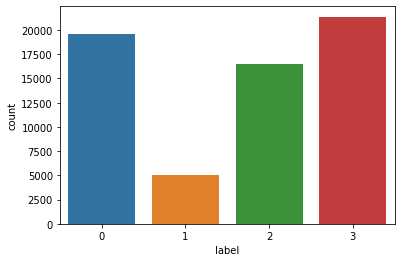

In [13]:
import seaborn as sns
sns.countplot(has_accepted_theme_five_baits_df['label'],orient="v")

In [14]:
theme2labels

{'قصيدة حزينه': 0,
 'قصيدة ذم': 1,
 'قصيدة رثاء': 0,
 'قصيدة رومنسيه': 3,
 'قصيدة شوق': 3,
 'قصيدة عتاب': 0,
 'قصيدة غزل': 3,
 'قصيدة فراق': 0,
 'قصيدة مدح': 2,
 'قصيدة هجاء': 1}

In [15]:
# min_class = has_accepted_theme_five_baits_df['label'].value_counts().values.min()
# min_class = 500
sample_amounts = {idx:5_000 if cnt > 5_000 else cnt for idx, cnt in has_accepted_theme_five_baits_df['label'].value_counts().iteritems()}
# sample_amounts[2] = min_class
# sample_amounts = {i:(min_class) for i in range(len(labels2theme)) }
print(sample_amounts)
has_accepted_theme_five_baits_df = (
    has_accepted_theme_five_baits_df.groupby('label').apply(lambda g: g.sample(
        # lookup number of samples to take
        n=sample_amounts[g.name],
        # enable replacement if len is less than number of samples expected
        replace=False  
    ))
)

{3: 5000, 0: 5000, 2: 5000, 1: 5000}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


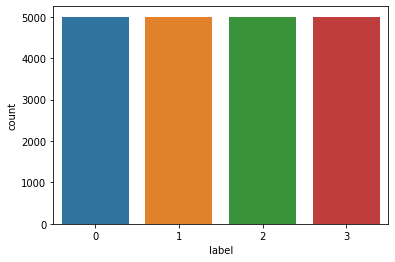

In [16]:
import seaborn as sns
sns.countplot(has_accepted_theme_five_baits_df['label'],orient="v")

In [17]:
from sklearn.utils import shuffle
import random

shuffle(has_accepted_theme_five_baits_df,  random_state=20).to_json('/content/theme_dataset_from_df.json',force_ascii=False,indent=2,orient='records')
json.dump({'data':json.load(open('/content/theme_dataset_from_df.json'))},open('/content/theme_dataset.json','w'),indent=4,ensure_ascii=False)

In [18]:
!head -10 /content/theme_dataset.json

{
    "data": [
        {
            "text": "لنا حاكِمٌ فيه انخِناثٌ وإنَّهُ يقولُ بأني مولَعٌ بِلُواطِ لهُ أسهُمٌ في الانفِعال صوائِبٌ وأسهُمُهُ في الفِعلِ جِدُّ خَواطِ فَتبّاً لهُ من حاكِمٍ مُتَزَيِّدٍ وشَيخِ لُواطٍ يَستجِيبُ لِوَاطِ قد أتى لفظُكَ البَديعُ الّذي خر رَتْ سجُوداً لُحسنِهِ الألفاظُ ومَعانيك إنَّهُنَّ وَفاءٌ وسَخاءٌ ونَجْدةٌ وحِفاظُ ظِلُّ الفتى ينفَعُ مَنْ دونَهُ ومالَهُ في ظِلِّهِ حَظُّ",
            "label": 1,
            "poem theme": "قصيدة ذم"
        },
        {
            "text": "لِأَيِّ حَبيبٍ يَحسُنُ الرَأيُ وَالوُدُّ وَأَكثَرُ هَذا الناسِ لَيسَ لَهُ عَهدُ أَرى ذَمِّيَ الأَيّامَ ما لا يَضِرُّها فَهَل دافِعٌ عَنّي نَوائِبَها الحَمدُ وَما هَذِهِ الدُنيا لَنا بِمُطيعَةٍ وَليسَ لِخَلقٍ مِن مُداراتِها بُدُّ تَحوزُ المَعالي وَالعَبيدُ لِعاجِزٍ وَيَخدُمُ فيها نَفسَهُ البَطَلُ الفَردُ أَكُلُّ قَريبٍ لي بَعيدٌ بِوِدِّهِ وَكُلُّ صَديقٍ بَينَ أَضلُعِهِ حِقدُ وَلِلَّهِ قَلبٌ لا يَبُلُّ غَليلَهُ وِصالٌ وَلا يُلهيهِ عَن خِلِّهِ وَعدُ يُكَلِّفُني أَن",
            "label

In [19]:
import tnkeeh as tn 
from datasets import load_dataset
import os 
from transformers import AutoTokenizer
import torch
import copy 
import tkseem as tk

data_args = {
    'segment' : False,
    'remove_special_chars' : False,
    'remove_english' : True
,    'normalize' : False,
    'remove_diacritics' : True
,    'excluded_chars' : []
  ,  'remove_tatweel' : True
,    'remove_html_elements' : False,
    'remove_links' : False, 
    'remove_twitter_meta' : False,
    'remove_long_words' : False,
    'remove_repeated_chars' : False,
}

# more_stop_words = ['وما' , 'فما', 'كنت', 'ولو', 'إلا', 'وإن', 'منك', 'بما', 'وأنت', 'يا', 'لي', 'فلا', 'لنا', 'منهم']
# stop_words = open('/content/list.txt', 'r').read().splitlines() + more_stop_words

def get_tokenizer(tok_name):
    tokenizers = {'SentencePieceTokenizer':tk.SentencePieceTokenizer, 'WordTokenizer':tk.WordTokenizer, 'CharacterTokenizer':tk.CharacterTokenizer,
         'MorphologicalTokenizer':tk.MorphologicalTokenizer, 'RandomTokenizer':tk.RandomTokenizer, 'DisjointLetterTokenizer':tk.DisjointLetterTokenizer}
    return tokenizers[tok_name] 


def split_dataset(dataset, seed = 42):
    #create validation split
    if 'valid' not in dataset:
        train_valid_dataset = dataset['train'].train_test_split(test_size=0.1, seed = seed)
        dataset['valid'] = train_valid_dataset.pop('test')
        dataset['train'] = train_valid_dataset['train']

    #create training split 
    if 'test' not in dataset:
        train_valid_dataset = dataset['train'].train_test_split(test_size=0.1, seed = seed)
        dataset['test'] = train_valid_dataset.pop('test')
        dataset['train'] = train_valid_dataset['train']  
    return dataset 


def clean_dataset(dataset):
    
    cleaner = tn.Tnkeeh(**data_args)
    dataset = cleaner.clean_hf_dataset(dataset, 'text')
    return dataset 

def remove_stop_words(example):
    example['text'] = ' '.join([word for word in example['text'].split(' ') if word not in stop_words])
      
    return example

tokenizer_name = ''
max_tokens = 128
vocab_size  = 10_000

batch_size = 512

# clean and load data
dataset = load_dataset('json',data_files=['/content/theme_dataset.json'],field='data')
dataset = clean_dataset(dataset)

dataset = split_dataset(dataset)
# dataset = dataset.map(remove_stop_words)
examples = copy.deepcopy(dataset)


data = []
for sample in dataset['train']:
    data.append(sample['text'])

open(f'/content/data.txt', 'w').write(('\n').join(data))
tokenizer = tk.SentencePieceTokenizer
tokenizer = tokenizer(vocab_size = vocab_size)
tokenizer.train('/content/data.txt')
dataset = dataset.map(lambda examples:{'input_ids': tokenizer.encode_sentences(examples['text'], out_length= max_tokens)}, batched=True)
columns=['input_ids', 'labels'] 
dataset = dataset.map(lambda examples:{'labels': examples['label']}, batched=True)

Using custom data configuration default-0793e8e7e0e59e6c


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-0793e8e7e0e59e6c/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?ex/s]

Training SentencePiece ...


  0%|          | 0/17 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/17 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [20]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'poem theme', 'input_ids', 'labels'],
        num_rows: 16200
    })
    valid: Dataset({
        features: ['text', 'label', 'poem theme', 'input_ids', 'labels'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'poem theme', 'input_ids', 'labels'],
        num_rows: 1800
    })
})

In [21]:
import tensorflow as tf
import numpy as np
import os
import time
import glob
from tensorflow.keras.layers import GRU, Embedding, Dense, Input, Dropout, Bidirectional, BatchNormalization, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



def create_model():
  model = Sequential()
  model.add(Input((max_tokens,)))
  model.add(Embedding(10_000, 128))
  model.add(Bidirectional(GRU(units = 64, return_sequences=True, dropout=0.3)))
  model.add(Bidirectional(GRU(units = 64, return_sequences=True, dropout=0.3)))
  model.add(Bidirectional(GRU(units = 64, dropout=0.3)))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(len(labels2theme), activation = 'softmax'))
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model


checkpoint_path = "/content/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

callbacks = [tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 monitor='val_accuracy',
                                                 verbose=1,
                                                 save_weights_only=True,
                                                 save_best_only= True,
                                                 mode='max')]

In [22]:
x_train = np.array(dataset['train']['input_ids'])
y_train = np.array(dataset['train']['labels'])
x_valid = np.array(dataset['valid']['input_ids'])
y_valid = np.array(dataset['valid']['labels'])

In [23]:
model = create_model()
# model.summary()

In [24]:
model.fit(x_train, y_train, validation_data = (x_valid, y_valid) , callbacks= callbacks, epochs = 5, shuffle = True, batch_size=128)

Epoch 1/5
126/127 [============================>.] - ETA: 0s - loss: 1.3870 - accuracy: 0.2529
Epoch 1: val_accuracy improved from -inf to 0.27550, saving model to /content/cp.ckpt
127/127 [==============================] - 26s 78ms/step - loss: 1.3869 - accuracy: 0.2532 - val_loss: 1.3790 - val_accuracy: 0.2755
Epoch 2/5
126/127 [============================>.] - ETA: 0s - loss: 1.3078 - accuracy: 0.3825
Epoch 2: val_accuracy improved from 0.27550 to 0.33950, saving model to /content/cp.ckpt
127/127 [==============================] - 8s 59ms/step - loss: 1.3077 - accuracy: 0.3828 - val_loss: 1.3563 - val_accuracy: 0.3395
Epoch 3/5
126/127 [============================>.] - ETA: 0s - loss: 1.0499 - accuracy: 0.5619
Epoch 3: val_accuracy did not improve from 0.33950
127/127 [==============================] - 7s 58ms/step - loss: 1.0502 - accuracy: 0.5617 - val_loss: 1.4380 - val_accuracy: 0.3385
Epoch 4/5
126/127 [============================>.] - ETA: 0s - loss: 0.7821 - accuracy: 0.70

In [25]:
x_test = np.array(dataset['test']['input_ids'])
y_test = np.array(dataset['test']['labels'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


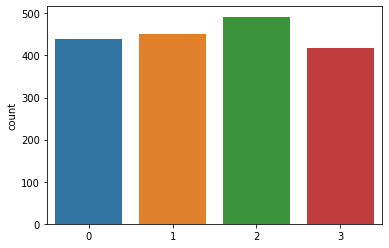

In [26]:
sns.countplot(y_test)

In [27]:
model = create_model()
model.load_weights(checkpoint_path)
model.evaluate(x_test, y_test, batch_size = 256)

8/8 [==============================] - 4s 31ms/step - loss: 1.6816 - accuracy: 0.3350


[1.681551456451416, 0.33500000834465027]

In [28]:
y_pred = model.predict(x_test, batch_size = 256)

[[133 115  99  93]
 [118 146 112  74]
 [107 106 201  78]
 [109  92  94 123]]


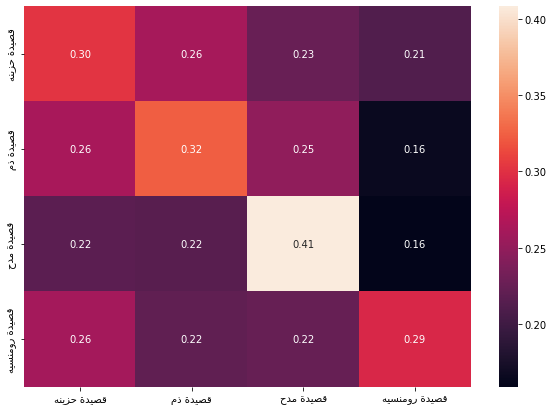

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from bidi.algorithm import get_display
import arabic_reshaper

cm = confusion_matrix(y_test, y_pred.argmax(-1))
print(cm)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
lbls = [get_display(arabic_reshaper.reshape(lbl[0])) for lbl in labels2theme]
df_cm = pd.DataFrame(cmn, lbls, lbls)
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='.2f') # font size

plt.show()